# Regressão Linear Múltipla – Projeto

Uma laboratório de análises clínicas que conduz testes de colesterol, deseja avaliar, com base em características dos pacientes, tais como idade, nível de atividade física, peso, dentre outras, se estas variáveis influenciam no resultado do exame de colesterol total.

Para isso, iremos treinar um **algoritmo de regressão linear múltipla**, de forma que seja possível **prever o resultado do exame de colesterol**, dada as características do paciente.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# carregar o arquivo CSV
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
# checar arquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# remover coluna ID
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [5]:
# renomear colunas
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [6]:
# copiar df para df eda
df_colesterol_eda = df_colesterol.copy()

In [7]:
# copiar df para df bucketing
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [8]:
# visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [9]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [10]:
# detectar valore ausentes
df_colesterol_eda.isnull().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [11]:
# medidas estatisticas do dataframe
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [12]:
# coletar medidas das variaveis categoricas
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [13]:
# coletar medidas das variaveis numericas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [14]:
# imputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [15]:
# converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [16]:
# estrutura do dataframe
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [17]:
# visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

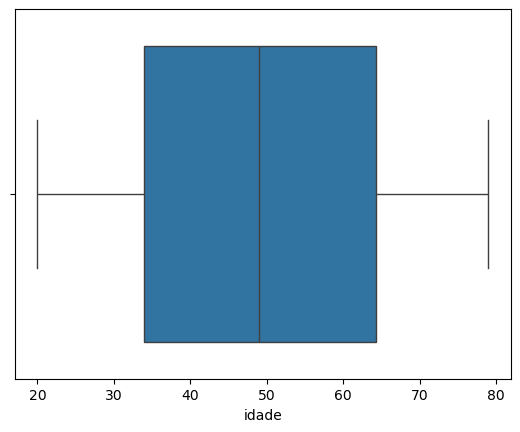

In [18]:
# verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

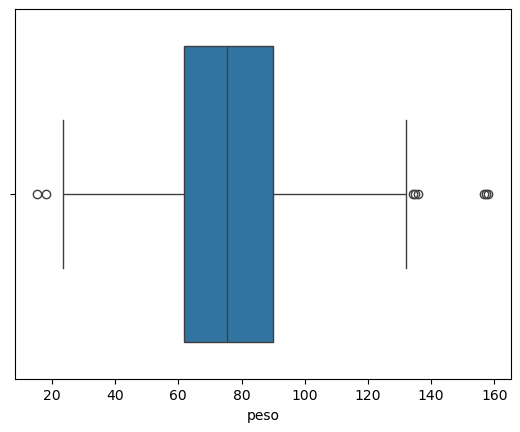

In [19]:
sns.boxplot(data=df_colesterol_eda, x='peso')

In [20]:
# filtrar o publico a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [21]:
# remover publico do dataframe
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

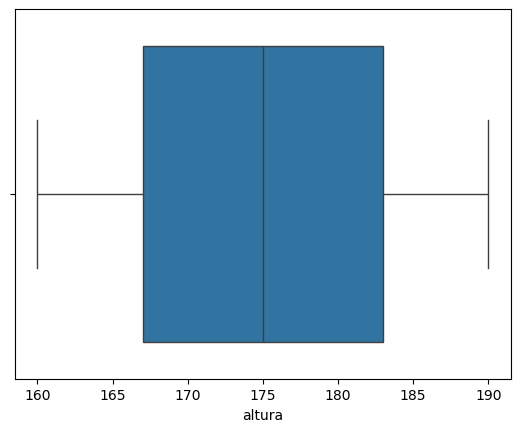

In [22]:
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

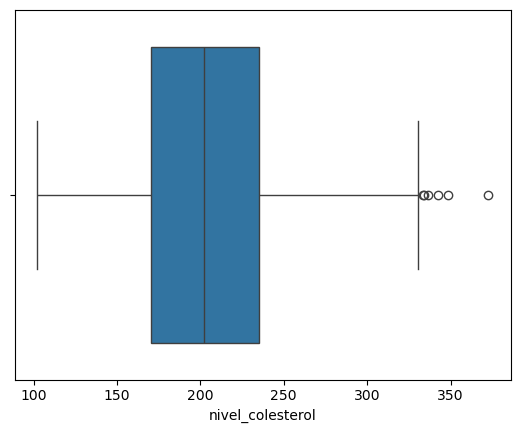

In [23]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

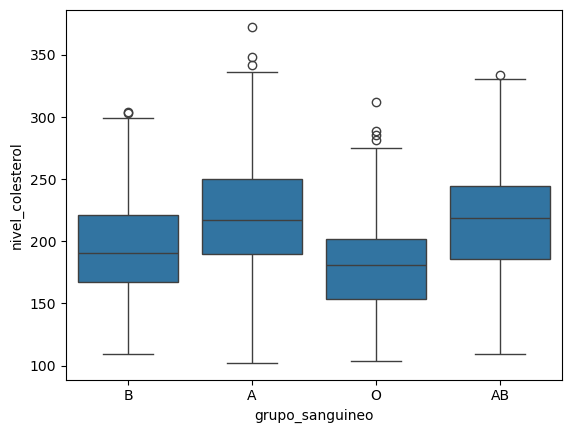

In [24]:
# cruzamento de variaveis categoricas com nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

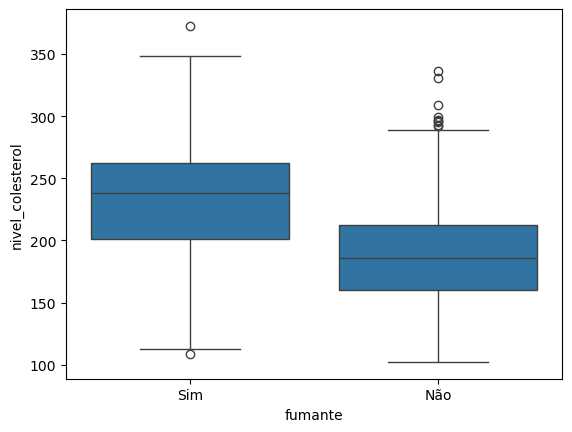

In [25]:
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

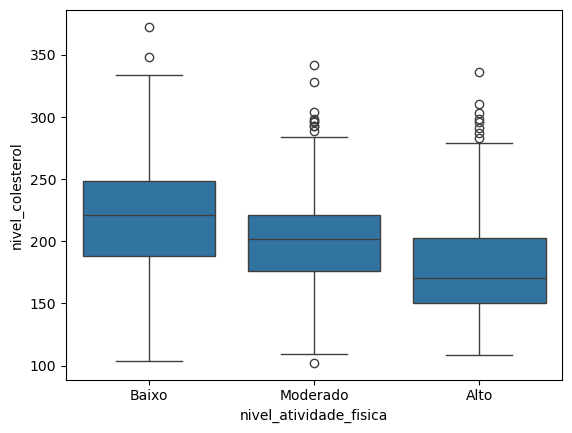

In [26]:
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

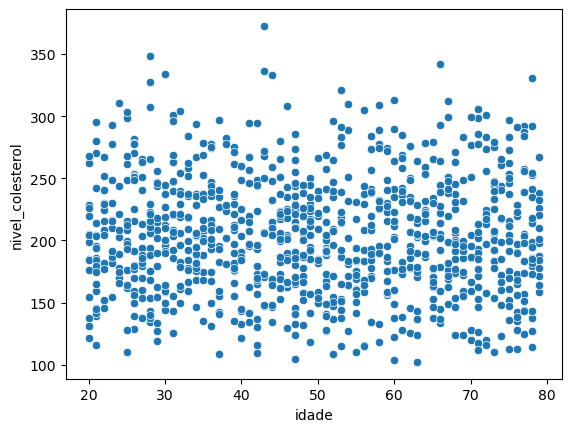

In [27]:
# cruzamento de variaveis numericas com nivel de colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

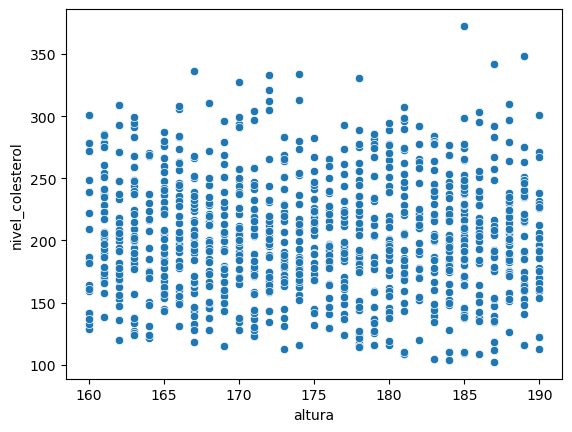

In [28]:
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

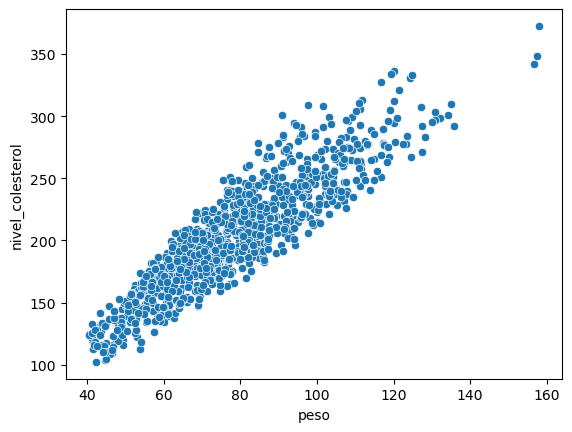

In [29]:
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

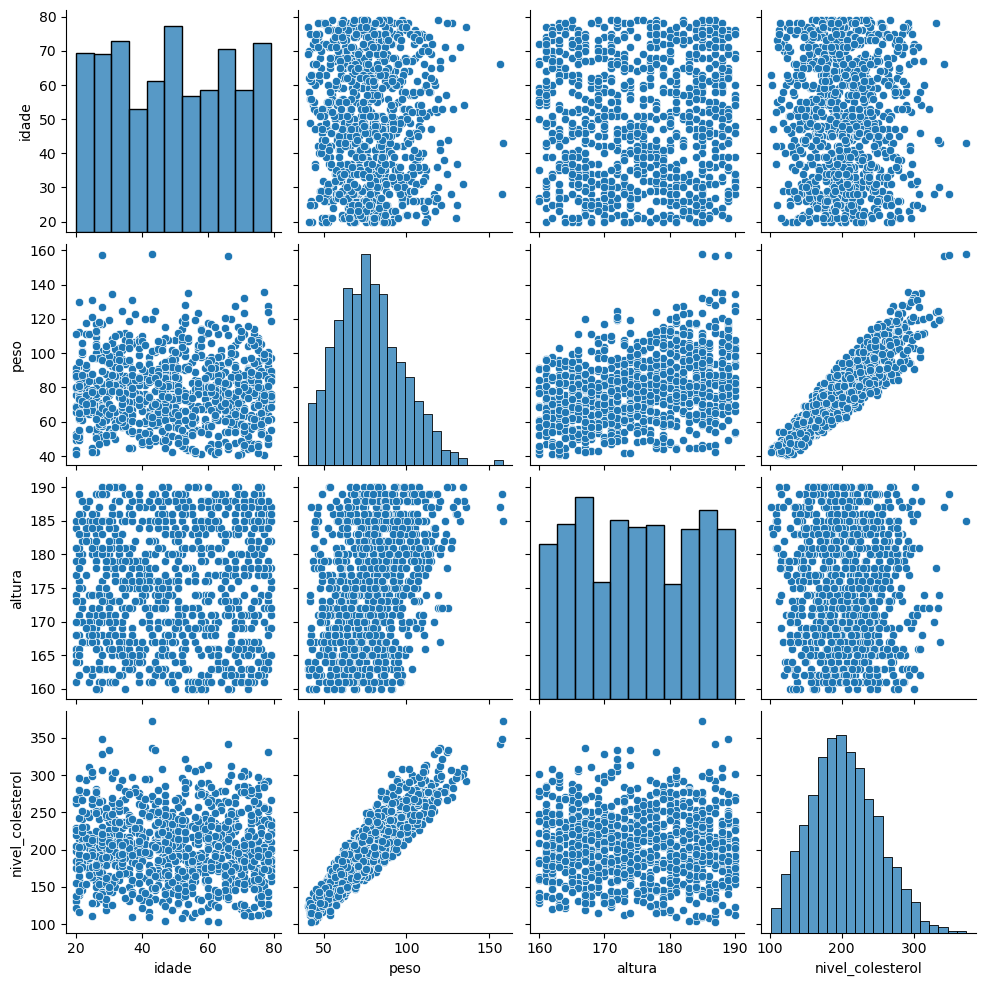

In [30]:
sns.pairplot(data=df_colesterol_eda)

In [31]:
# converter variaveis categoricas nominais em numericas, usando One-Hot Encoder do Pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [32]:
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [33]:
# converter variavel categorica orrdinal em numerica, usando factorize do Pandas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda['nivel_atividade_fisica'])[0] + 1

<Axes: >

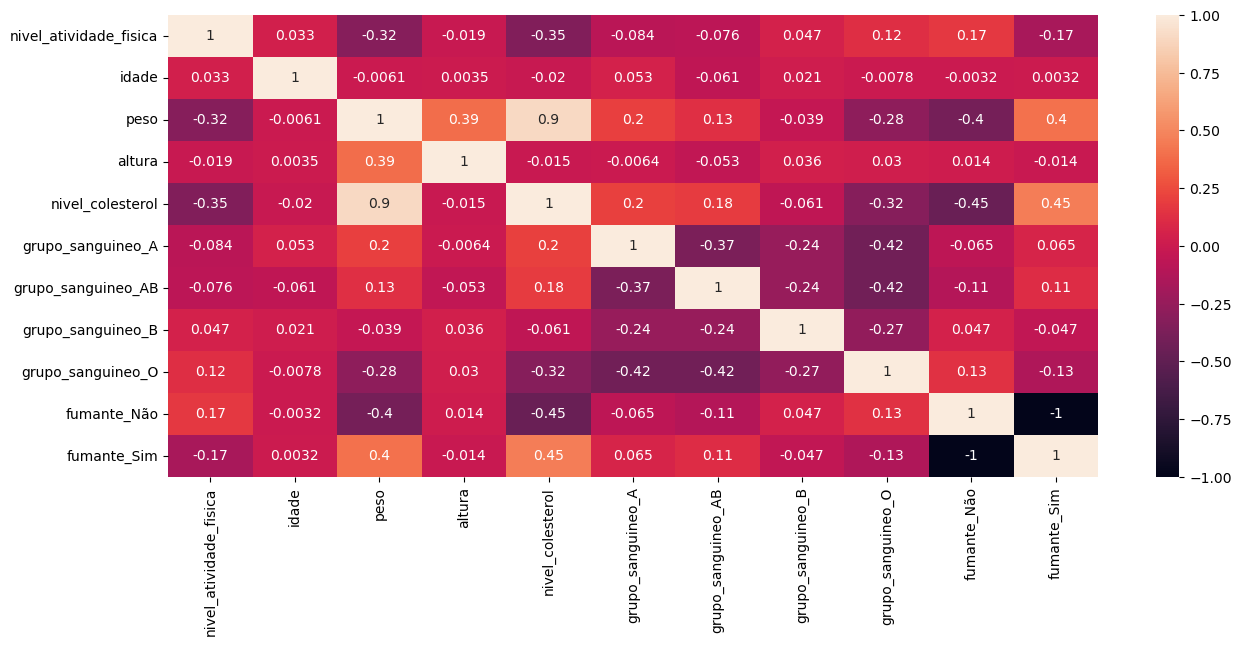

In [34]:
# mapa de calor com correlacao entre as variaveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

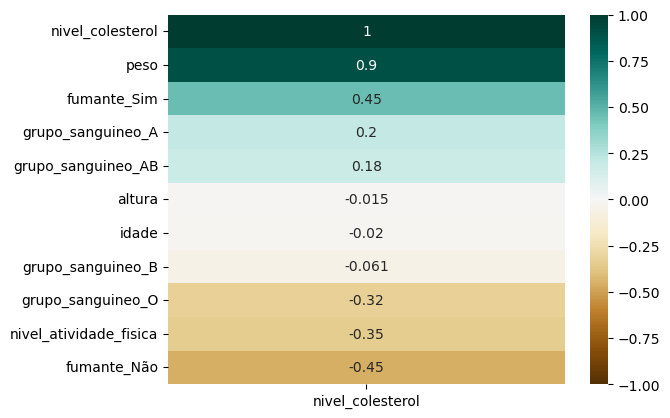

In [35]:
# formato de ranking, somente correlacao com a variavel target (nivel colesterol)
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [36]:
# bucketing idade
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], bins = bins_idade, labels = labels_idade, include_lowest=True)


In [37]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

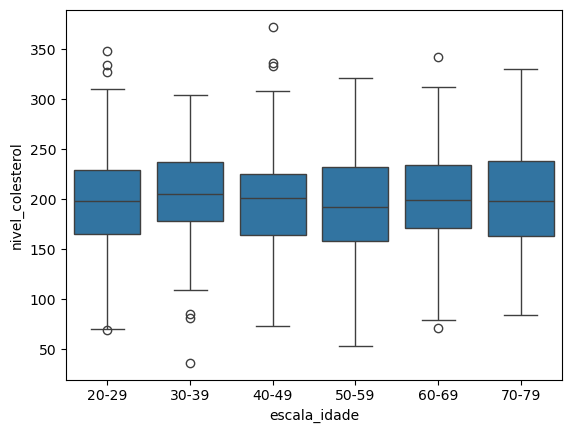

In [38]:
sns.boxplot(data=df_colesterol_bucketing, x='escala_idade', y='nivel_colesterol')

In [39]:
# bucketing peso
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x = df_colesterol_bucketing['peso'], bins = bins_peso, labels = labels_peso, include_lowest=True)

<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

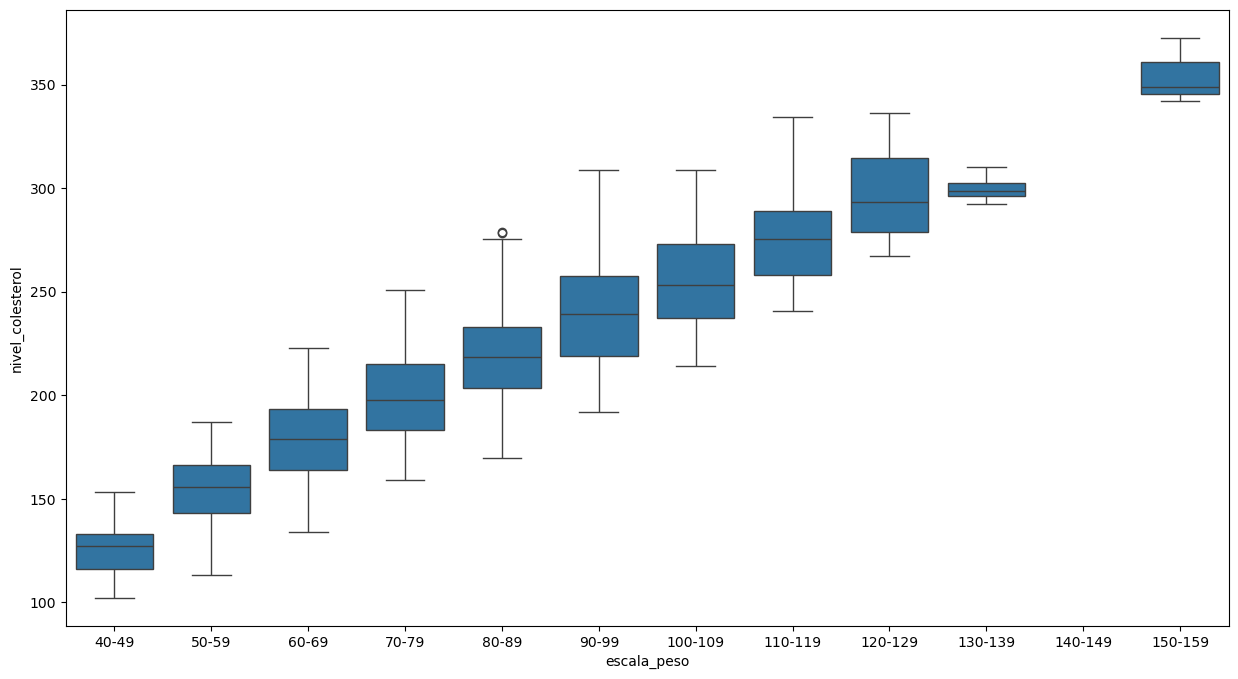

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_colesterol_bucketing, x='escala_peso', y='nivel_colesterol')

## Treinar modelo

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
# criar dataset de treino e teste
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, axis=0, inplace=True)

In [43]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [44]:
X = df_colesterol.drop(columns=['nivel_colesterol'], axis=1)
y = df_colesterol['nivel_colesterol']

In [45]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [48]:
y_test.shape

(289,)

# Pipeline
- Imputar moda nas variáveis categóricas – `grupo_sanguineo`, `fumante`, `nivel_atividade_fisica`
- Padronizar variáveis numéricas – `idade`, `altura`, `peso`
- OneHotEncode nas variáveis categóricas nominais – `grupo_sanguineo`, `fumante`
- OrdinalEncoder nas variáveis categóricas ordinais – `nivel_atividade_fisica`
- Imputar mediana nas variáveis numéricas – `idade`, `altura`, `peso`


In [49]:
# nomes das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'peso', 'altura']
colunas_ordinais = ['nivel_atividade_fisica']

In [50]:
# transformer categoricas
transformer_categoricas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [51]:
# transformer ordinais
transformer_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error')),
])

In [52]:
# transformer numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [53]:
# criar um column transformer que encapsula todas as transformacoes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categoricas, colunas_categoricas),
        ('ord', transformer_ordinais, colunas_ordinais)
    ]
)

In [54]:
# criando o pipeline principal = preprocessor + treinamento
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [55]:
# treinar o modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso', 'altura']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('regressor', LinearRegression())])

## Análise de Métricas

In [56]:
# gerar predicao
y_pred = model_regr.predict(X_test)

In [67]:
# calcular o r2 score
r2_score = r2_score(y_test, y_pred)
print(f'R2 score: {r2_score:.3f}')

R2 score: 0.959


In [68]:
# calcular o MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.3f}')

MAE: 7.314


In [69]:
# calcular o RMSE (Root Mean Squared Error)
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.3f}')

RMSE: 9.098


## Análise de Residuos

In [70]:
# calcular residuos
residuos = y_test - y_pred

In [71]:
# transformar os residuos na escala padrao
# (X - media) / desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

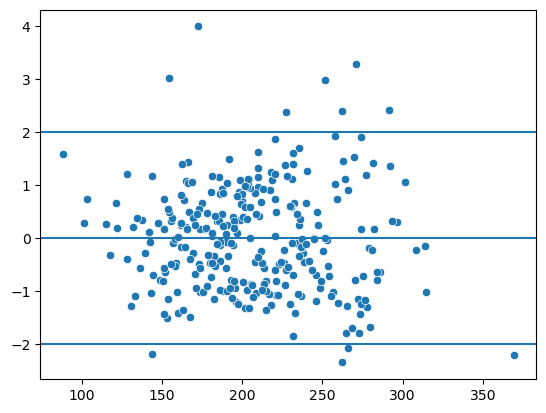

In [72]:
# verificar linearidade dos residuos: valores entre -2 e 2 (escala padrao)
# verificar homocedasticidade: valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

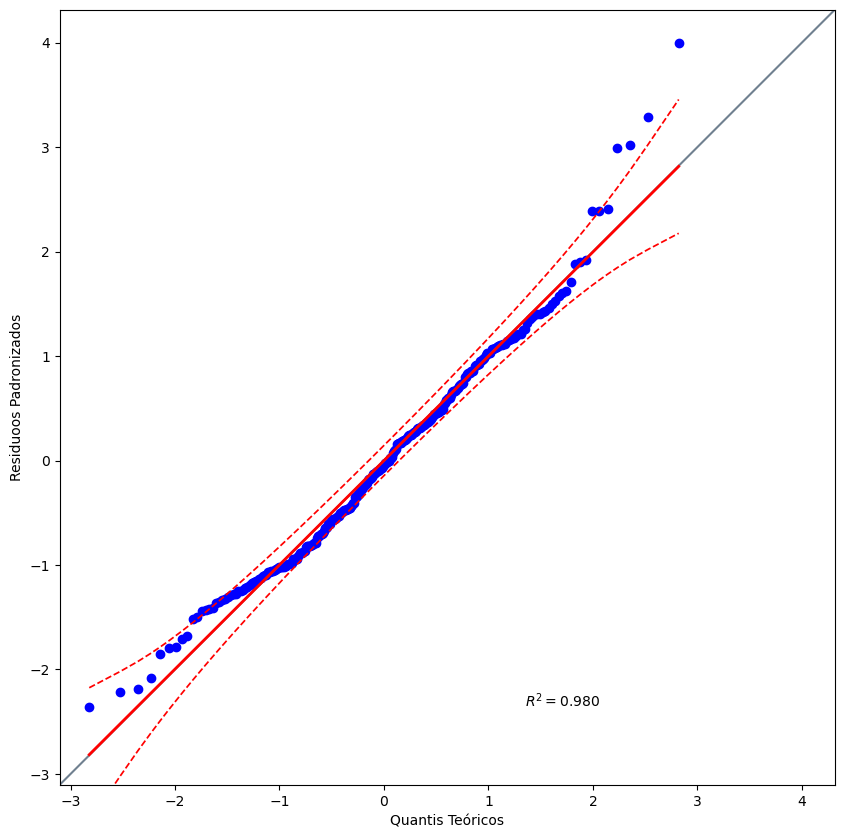

In [81]:
# checar se residuoos seguem uma distribuicao normal
# qq plot
import pingouin as pg
plt.figure(figsize=(10,14))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuoos Padronizados')
plt.show()

In [83]:
# teste de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

stat_shapiro, p_value_shapiro = shapiro(residuos_std)
print('Estatistica do Teste: {} e P-Value: {}'.format(stat_shapiro, p_value_shapiro))

Estatistica do Teste: 0.9807737729720724 e P-Value: 0.0006268860444488094


In [84]:
# teste de komogrov-smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print('Estatistica do Teste: {} e P-Value: {}'.format(stat_ks, p_value_ks))

Estatistica do Teste: 0.42455920998485613 e P-Value: 8.925833190910163e-48


In [85]:
# teste de lilliefors
stat_ll, p_value_ll = lilliefors(residuos, 'norm', pvalmethod='table')
print('Estatistica do Teste: {} e P-Value: {}'.format(stat_ll, p_value_ll))

Estatistica do Teste: 0.04955371030192818 e P-Value: 0.12533323720737932


In [86]:
# teste de anderson-darling
stat_and, critical_and, significance_and = anderson(residuos, 'norm')

In [87]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [88]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [89]:
print('Estatistica do Teste: {} e Valor Crítico: {}'.format(stat_and, critical_and[2]))

Estatistica do Teste: 0.9169275158490109 e Valor Crítico: 0.776


In [90]:
# teste de homocedasticidade - Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [91]:
X_test_transformed

array([[-1.44340738,  0.22608781, -0.58669129, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.20886474, -1.05685776, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.84754575, -0.35160806, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.09014564, -1.52702423, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099,  0.17447081, -0.35160806, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.65277092, -1.17439938, ...,  0.        ,
         1.        ,  0.        ]], shape=(289, 10))

In [92]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print('Estatistica do Teste: {} e P-Value: {}'.format(stat_goldfeld, p_value_goldfeld))

Estatistica do Teste: 0.6716135765253543 e P-Value: 0.9893959472385482


## Realizar Predições Individuais

In [101]:
predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'nivel_atividade_fisica': 'Alto',
    'idade': 25,
    'peso': 80,
    'altura': 187
}
sample_df = pd.DataFrame(predicao_individual, index=[1])

In [102]:
sample_df

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura
1,O,Não,Alto,25,80,187


In [103]:
# predicao
model_regr.predict(sample_df)

array([174.906227])

In [104]:
 import joblib

In [105]:
# salvar modelo
joblib.dump(model_regr, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']